In [7]:
import numpy as np
from statsmodels.stats.proportion import proportion_confint
import scipy.stats as sts

In [18]:
normal_interval = proportion_confint(1, 50, alpha = 0.05, method = 'normal')

In [19]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.000000, 0.058805] with width 0.058805


In [26]:
normal_interval = proportion_confint(1, 50, alpha = 0.05, method = 'wilson')
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.003539, 0.104954] with width 0.101415


In [20]:
def my_normal_proportion_confint(count, nobs, alpha=0.05):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = sts.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

print(my_normal_proportion_confint(1, 50))

(-0.018805307081790987, 0.05880530708179099)


In [24]:
def my_yulson_proportion_confint(count, nobs, alpha=0.05):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    z = sts.norm.isf(alpha / 2.)
    std_ = np.sqrt(q_ * (1 - q_) / nobs + z ** 2 / (2*nobs) ** 2)
    dist = z * std_
    ci_low = (q_ + z **2 / (2* nobs) - dist) / (1 + z**2/nobs)
    ci_upp = (q_ + z **2 / (2* nobs) + dist) / (1 + z**2/nobs)
    return ci_low, ci_upp

print(my_yulson_proportion_confint(1, 50))

(0.0035392592716462353, 0.10495443589637815)


In [27]:
from statsmodels.stats.proportion import samplesize_confint_proportion

n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))
n_samples

753

In [47]:
p = np.linspace(0,1,10000)
N_samples = []
for i in p:
    N_samples.append(samplesize_confint_proportion(i, 0.01))

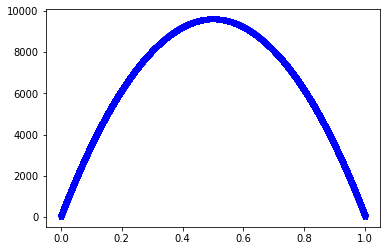

In [48]:
import matplotlib.pyplot as plt

plt.plot(p, N_samples, 'b*')
plt.show()

In [49]:
print(np.max(np.array(N_samples)))

9603.646955679636


# Контрольный тест

№1

In [95]:
sts.norm.isf((1-0.997)*0.5) 

2.9677379253417833

In [97]:
sts.norm.isf((1-0.95)*0.5) 

1.959963984540054

№5 

In [55]:
189/11034

0.017128874388254486

In [56]:
104/11037 

0.009422850412249705

In [62]:
189./11034. - 104./11037. 

0.0077060239760047815

№6

In [90]:
import scipy

def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [91]:
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample1)+
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [117]:
import random 
import pandas as pd

A = np.concatenate((np.zeros(11034-189), np.ones(189)))
print(A)
np.random.shuffle(A)
print(A)

B = np.concatenate((np.zeros(11037-104), np.ones(104)))
print(B)
np.random.shuffle(B)
print(B)
chance(A)
chance(B)

[0. 0. 0. ... 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 1. 1. 1.]
[0. 0. 0. ... 0. 0. 0.]


0.009512485136741973

In [94]:
print("confidence interval: [%f, %f]" % proportions_confint_diff_ind(A, B))
print("confidence interval: [%f, %f]" % proportions_confint_diff_rel(A, B))

confidence interval: [0.004688, 0.010724]


TypeError: object of type 'zip' has no len()

№7

In [99]:
189/(11034-189)

0.017427385892116183

In [100]:
104/(11037-104)

0.009512485136741973

In [102]:
round(0.017427385892116183/0.009512485136741973, 4)

1.8321

№8

In [120]:
def chance(A):
    return np.sum(A)/(len(A)-np.sum(A))

def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

np.random.seed(0)

plac = np.concatenate((np.ones(189), np.zeros(11034-189)))
asp = np.concatenate((np.ones(104), np.zeros(11037-104)))

Plac = get_bootstrap_samples(plac, 1000)
Asp = get_bootstrap_samples(asp, 1000)

plac_scores = []
for a in Plac:
    plac_scores.append(chance(a))
#print(plac_scores)

asp_scores = []
for a in Asp:
    asp_scores.append(chance(a))
#print(asp_scores)

scores = []
for i in range(len(plac_scores)):
    scores.append(plac_scores[i]/asp_scores[i])
print(i)
#print(scores)

print("95% confidence interval for the difference between medians",  stat_intervals(scores, 0.05))

999
95% confidence interval for the difference between medians [1.46286276 2.35093673]
